# Fracción de galaxias por host envioroment

- Selecciono las galaxias usando el corte de magnitud. 
- Observo la cantidad de pasivas en cada host usando la etiqueta hecha por anto.
- Luego hago un match con el data set que tiene la etiqueta del host enviorment
- Luego hago un group_by por host environment. 

**Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from collections import Counter
import numpy as np
from itertools import cycle, islice

**Funtions**

In [2]:
def diff(list1, list2):
    c = set(list1).union(set(list2))  # or c = set(list1) | set(list2)
    d = set(list1).intersection(set(list2))  # or d = set(list1) & set(list2)
    return list(c - d)

### Galaxias en GC

**Load**

In [3]:
path_gal_gru = '../../data/tab_gal_gru.dat'
#path_gal_gru = '/home/vanessa/Escritorio/Doctorado/anto_gitano_vane/cg_environments/data/tab_gal_gru.dat'

df = pd.read_table(path_gal_gru, sep="\s+", names=['ngc', 'nk', 'alg', 'delg', 'zred', 'rmag', 'gmag', 'umag', 'gal_ID', 'r50', 'r90', 'r_abs', 'g_abs', 'u_abs', 'pasiva', 'early' ])
id_gc_gal_grup = df.ngc.to_list()
display(df.shape)

path = '../../data/compact_in_all_estado.csv'

df1 = pd.read_csv(path)
id_gc_class = df1.i_gru.to_list()

(2070, 16)

**Lista de GCs descartandos por corte de Magnitud**

In [4]:
diferencia = diff(id_gc_class, id_gc_gal_grup)
df = df.set_index('ngc').drop(diferencia)

In [5]:
df = df.reset_index()

In [6]:
display(df.shape)

(2012, 16)

**Cantidad de pasivas por grupo**

In [7]:
df_pasivas = df.groupby(["ngc"])["pasiva"].sum()

In [8]:
len(df_pasivas.values)

449

In [9]:
df_pasivas = df_pasivas.reset_index()
df_pasivas.head(2)

,ngc,pasiva
0,1,3
1,2,4


**Match**

In [10]:
df1_sort = df1.sort_values('i_gru', ignore_index=True).copy()
df_pasivas_sort = df_pasivas.sort_values('ngc', ignore_index=True).copy()

In [11]:
df1_sort.head(2)

,i_gru,n_m,Ra,dec,z,thete_g,mu,sigv,r_b,flag,rabs1,d_ij,tcr,rp,rabs2,Target
0,1,4,114.842,45.103,0.078292,2.62,25.018,348.679,14.719,0,-22.375,0.143311,0.037275,87.756599,-20.608,Field
1,2,4,116.577,22.020,0.046817,4.09,25.289,274.092,14.289,0,-21.512,0.092313,0.030544,82.543709,-20.895,Loose


In [12]:
df_final = df1_sort.join(df_pasivas_sort)

In [13]:
df_final.shape

(449, 18)

In [14]:
df_final.tail()

,i_gru,n_m,Ra,dec,z,thete_g,mu,sigv,r_b,flag,rabs1,d_ij,tcr,rp,rabs2,Target,ngc,pasiva
444,458,7,243.981,38.537,0.034782,6.091,26.202,138.779,14.577,1,-20.570,0.103047,0.067340,91.589798,-20.088,Field,458,3
445,459,4,244.410,50.641,0.041362,4.748,25.610,552.432,14.146,1,-21.441,0.099180,0.016282,84.761040,-20.121,Loose,459,3
446,460,5,245.283,13.159,0.034352,3.715,24.912,247.585,14.328,1,-20.778,0.079042,0.028953,55.171383,-19.839,Loose,460,3
447,461,4,247.547,36.247,0.075265,3.671,25.664,383.398,14.479,1,-22.477,0.160493,0.037964,118.280334,-20.026,Field,461,3
448,462,5,250.332,13.424,0.050796,4.130,24.858,268.188,13.764,1,-22.276,0.112063,0.037895,90.346329,-21.427,Loose,462,5


In [15]:
df_final.columns

Index(['i_gru', 'n_m', 'Ra', 'dec', 'z', 'thete_g ', 'mu', 'sigv', 'r_b',
       'flag', 'rabs1', 'd_ij', 'tcr', 'rp', 'rabs2', 'Target', 'ngc',
       'pasiva'],
      dtype='object')

**group_by  host environmen**

In [16]:
pasivas_env = df_final.groupby('Target')['pasiva'].sum()
pasivas_env

Target
FIl       150
Field     540
Loose     467
Node      175
voidED     52
voidIN     35
Name: pasiva, dtype: int64

In [17]:
gxs_env = df_final.groupby('Target')['n_m'].sum()
gxs_env 

Target
FIl       200
Field     851
Loose     622
Node      205
voidED     78
voidIN     56
Name: n_m, dtype: int64

**Fracción  de galaxias por entorno**

In [18]:
frecuencia = []
for i in range(len(gxs_env)):
    frac = pasivas_env[i]/gxs_env[i]
    frecuencia.append(frac)

**Gráfico 7 - panel superior**

In [19]:
frec = [frecuencia[3], frecuencia[2], frecuencia[0], frecuencia[1], frecuencia[5], frecuencia[4]]
print(frec)
X = ['Node', 'Loose', 'FIl', 'Field', 'voidIN', 'voidED']
print(X)

[0.8536585365853658, 0.7508038585209004, 0.75, 0.6345475910693302, 0.625, 0.6666666666666666]
['Node', 'Loose', 'FIl', 'Field', 'voidIN', 'voidED']


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st

In [21]:
#frec = [0.6536585365853659, 0.5910543130990416, 0.605,  0.45336481700118064, 0.4631578947368421, 0.46153846153846156]
#X = ['Node', 'Loose', 'FIl', 'Field', 'VoidS', 'VoidR']
#X = ['FIl','Field','Loose','Node ','VoiR ', 'VoiS']

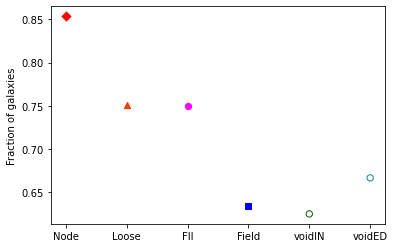

In [22]:
#my_pal = {"Node":"red","FIl":"#EE4000", "Loose":"Magenta", "Field":"blue", "VoiS":"Darkgreen", "VoiR":"Deepskyblue"}
#https://www.webucator.com/article/python-color-constants-module/
plt.scatter(X[0], frec[0], marker='D', s=40, color='r')
plt.scatter(X[1], frec[1], marker='^', s=40, color="#EE4000")
plt.scatter(X[2], frec[2], marker='o', s=40, color="Magenta")
plt.scatter(X[3], frec[3], marker='s', s=40, color='blue')
plt.scatter(X[4], frec[4],  s=40, facecolors='none', edgecolors= '#006400')
plt.scatter(X[5], frec[5],  s=40, facecolors='none', edgecolors='#008B8B')

plt.ylabel('Fraction of galaxies')
plt.savefig('FRAC_GAX_ENV_cuadratica.eps',format='eps')

**barras de error**

Para su calculo tomo la distribución de galaxias pasivas en cada entorno. 
Por lo tanto, tomo el df y le agrego una etiqueta de env para tomar todo el conjunto de galaxias en ese entono. 

In [23]:
df1_sort.head(2)

,i_gru,n_m,Ra,dec,z,thete_g,mu,sigv,r_b,flag,rabs1,d_ij,tcr,rp,rabs2,Target
0,1,4,114.842,45.103,0.078292,2.62,25.018,348.679,14.719,0,-22.375,0.143311,0.037275,87.756599,-20.608,Field
1,2,4,116.577,22.020,0.046817,4.09,25.289,274.092,14.289,0,-21.512,0.092313,0.030544,82.543709,-20.895,Loose


In [24]:
df.head(5)

,ngc,nk,alg,delg,zred,rmag,gmag,umag,gal_ID,r50,r90,r_abs,g_abs,u_abs,pasiva,early
0,1,1,114.844,45.118,0.079785,14.719,15.661,18.910,1237663786878238968,6.580098,20.917290,-22.38191,-21.56168,-19.65829,1,1
1,1,2,114.840,45.124,0.077575,16.380,16.885,18.360,1237663786878238970,2.361705,5.640143,-20.61242,-20.12822,-18.97008,0,0
2,1,3,114.850,45.082,0.078914,16.813,17.693,19.805,1237663786878238862,1.159409,3.226531,-20.25581,-19.49058,-17.69719,1,1
3,1,4,114.819,45.088,0.077670,17.100,17.960,18.419,1237663786878239171,1.915957,4.649888,-19.93044,-19.18009,-17.40807,1,0
4,2,1,116.553,21.996,0.045715,14.289,15.159,18.923,1237657872706371884,4.118502,14.232860,-21.52291,-20.69774,-18.84521,1,1


In [25]:
Target = []

for i in range(df.shape[0]):
    for j in range(df1_sort.shape[0]):
        if (df.ngc.iloc[i] == df1_sort.i_gru.iloc[j]):
            Target.append(df1_sort.Target.iloc[j])
            

In [26]:
Target[0:5]

['Field', 'Field', 'Field', 'Field', 'Loose']

In [27]:
df['Target'] = Target

**NOTA:** En nuestro caso como uno de los valores es cero en el gráfico de barras, la media coincide con la fracción de pasivas. 

In [28]:
import numpy as np
from astropy.stats import jackknife_resampling
from astropy.stats import jackknife_stats

In [29]:
def estimador_env(data, test_statistic):    
    estimate, bias, stderr, conf_interval = jackknife_stats(
    data, test_statistic, 0.95)
    
    return(estimate, bias, stderr, conf_interval)

In [30]:
frac = np.mean

In [31]:
e = []

**NODE**

'estimador'

0.8536585365853658

'stderr'

0.02474632469248247

'conf_interval'

array([0.80515663, 0.90216044])

'conf_interval_bernoulli'

0.06287661356608193

'conf_interval_jackknife'

0.048501905146999924

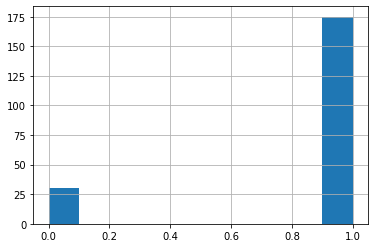

In [32]:
gxs_Node = df[df['Target'] == 'Node']
gxs_Node.shape #coincide con lo hecho anteriormente
# distribución de la variable discreta pasiva
gxs_Node.pasiva.hist()
gxs_Node.pasiva.mean()
estimate, bias, stderr, conf_interval = estimador_env(gxs_Node.pasiva.values, frac)
display('estimador', estimate)
display('stderr', stderr)
display('conf_interval', conf_interval)

display('conf_interval_bernoulli', 0.06287661356608193)
ci = abs(estimate - conf_interval[0])
display('conf_interval_jackknife', abs(estimate - conf_interval[0]))
e.append(ci)

In [33]:
f = 143/205
Ntol = 205
err_porc = 1.96*np.sqrt(f*(1-f) / Ntol)

err_porc

0.06287661356608193

In [34]:
a = np.array([1, 0, 1, 0, 1 ,1])
a.mean()

0.6666666666666666

In [35]:
4/6

0.6666666666666666

**LOOSE**

0.017357537195860594

'conf_interval_jackknife'

0.03402014776420115

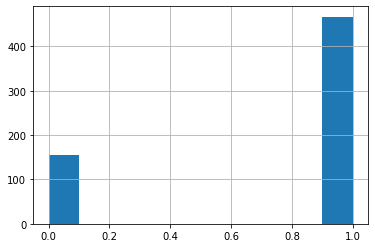

In [36]:
gxs_Loose = df[df['Target'] == 'Loose']
gxs_Loose.shape #coincide con lo hecho anteriormente
# distribución de la variable discreta pasiva
gxs_Loose.pasiva.hist()
gxs_Loose.pasiva.mean()
estimate, bias, stderr, conf_interval = estimador_env(gxs_Loose.pasiva.values, frac)
display(stderr)
ci = abs(estimate - conf_interval[0])
display('conf_interval_jackknife', abs(estimate - conf_interval[0]))
e.append(ci)

**FILL**

0.030695456590127308

'conf_interval_jackknife'

0.0601619894056622

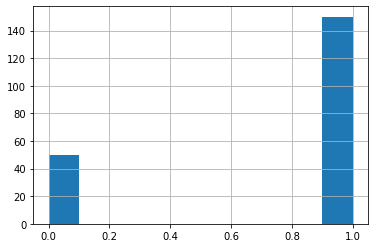

In [37]:
gxs_FIl = df[df['Target'] == 'FIl']
gxs_FIl.shape #coincide con lo hecho anteriormente
# distribución de la variable discreta pasiva
gxs_FIl.pasiva.hist()
gxs_FIl.pasiva.mean()
estimate, bias, stderr, conf_interval = estimador_env(gxs_FIl.pasiva.values, frac)
display(stderr)
ci = abs(estimate - conf_interval[0])
display('conf_interval_jackknife', abs(estimate - conf_interval[0]))
e.append(ci)

**FIELD**

0.016517261763429845

'conf_interval_jackknife'

0.032373238179543073

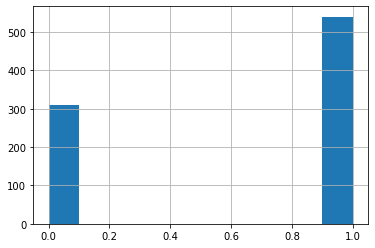

In [38]:
gxs_Field = df[df['Target'] == 'Field']
gxs_Field.shape #coincide con lo hecho anteriormente
# distribución de la variable discreta pasiva
gxs_Field.pasiva.hist()
gxs_Field.pasiva.mean()
estimate, bias, stderr, conf_interval = estimador_env(gxs_Field.pasiva.values, frac)
display(stderr)
ci = abs(estimate - conf_interval[0])
display('conf_interval_jackknife', abs(estimate - conf_interval[0]))
e.append(ci)

**VoiR**

0.053721530935025366

'conf_interval_jackknife'

0.10529226582700413

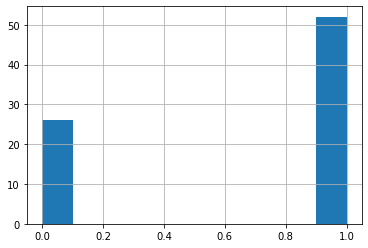

In [39]:
gxs_VoiR = df[df['Target'] == 'voidED']
gxs_VoiR.shape #coincide con lo hecho anteriormente
# distribución de la variable discreta pasiva
gxs_VoiR.pasiva.hist()
gxs_VoiR.pasiva.mean()
estimate, bias, stderr, conf_interval = estimador_env(gxs_VoiR.pasiva.values, frac)
display(stderr)
ci = abs(estimate - conf_interval[0])
display('conf_interval_jackknife', abs(estimate - conf_interval[0]))
e.append(ci)

**VoiS**

0.0652791209833867

'conf_interval_jackknife'

0.12794472606987084

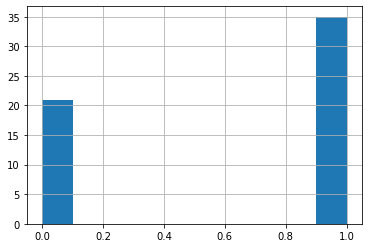

In [40]:
gxs_VoiS = df[df['Target'] == 'voidIN']
gxs_VoiS.shape #coincide con lo hecho anteriormente
# distribución de la variable discreta pasiva
gxs_VoiS.pasiva.hist()
gxs_VoiS.pasiva.mean()
estimate, bias, stderr, conf_interval = estimador_env(gxs_VoiS.pasiva.values, frac)
display(stderr)
ci = abs(estimate - conf_interval[0])
display('conf_interval_jackknife', abs(estimate - conf_interval[0]))
e.append(ci)

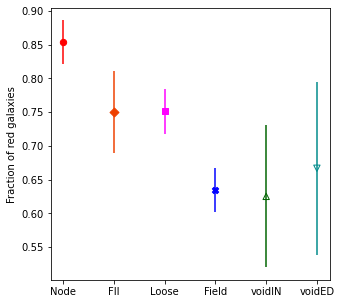

In [43]:
plt.figure(figsize=(5,5))

plt.scatter(X[0], frec[0], marker='o', s=40, color='r')
plt.scatter(X[2], frec[2], marker='D', s=40, color= "#EE4000")
plt.scatter(X[1], frec[1], marker='s', s=40, color="Magenta")
plt.scatter(X[3], frec[3], marker='X', s=40, color='blue')
plt.scatter(X[4], frec[4], marker='^', s=40, facecolors='none', edgecolors= '#006400')
plt.scatter(X[5], frec[5], marker='v', s=40, facecolors='none', edgecolors='#008B8B')

plt.errorbar(0, frec[0], yerr=0.03215843597706181, color='r')
plt.errorbar(1, frec[2], yerr=e[2], color=  "#EE4000")
plt.errorbar(2, frec[1], yerr=e[1], color= "Magenta")
plt.errorbar(3, frec[3], yerr=e[3], color= 'blue')
plt.errorbar(4, frec[4], yerr=e[4], color= '#006400')
plt.errorbar(5, frec[5], yerr=e[5], color= '#008B8B')

plt.ylabel('Fraction of red galaxies')
plt.savefig('estado_FracGxEarly.eps',format='eps')

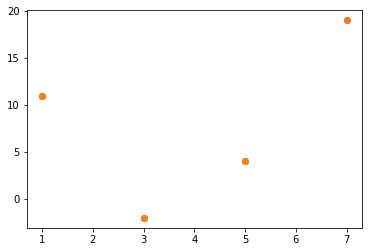

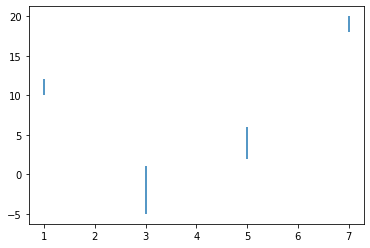

In [42]:
import matplotlib.pyplot as plt
a = [1,3,5,7]
b = [11,-2,4,19]
plt.scatter(a,b)
plt.scatter(a,b)
plt.show()
c = [1,3,2,1]
plt.errorbar(a,b,yerr=c, linestyle="None")

plt.show()